В этом задании две части - теоретическая и практическая. Теорию можно набирать в латехе или просто решить на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за задание - 10.

# Часть 1 (теоретическая).

## Задание 1 (**1.5 балла**).

Пусть $f(X)=ln(detX), X\in\mathbb{R}^{n\times n}$. Найдите производную $\nabla_X f(X).$

![task1](./images/MLHL_HW2.1.png)

## Задание 2 (**2 балла**).

Пусть $f(x)=x^Texp(xx^T)x, x\in\mathbb{R}^n,$ а $exp(B)$ - матричная экспонента, $B\in\mathbb{R}^{n\times n}.$ Матричной экспонентой обозначают ряд

$I_n+\frac{B}{1!}+\frac{B^2}{2!}+\dots=\sum\limits_{k=0}^{\infty}\frac{B^k}{k!}.$

Найдите производную $\nabla_x f(x).$

![task2](./images/MLHL_HW2.2.png)

## Задание 3 (**1.5 балла**).

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

![task3](./images/MLHL_HW2.3.png)

## Часть 2 (практическая).

## Задание 4 (**1 балл**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

$\nabla_w Q(w)=X^T(Xw-y).$

Решаем $X^T(Xw-y) = 0$ относительно $w$

(100,)


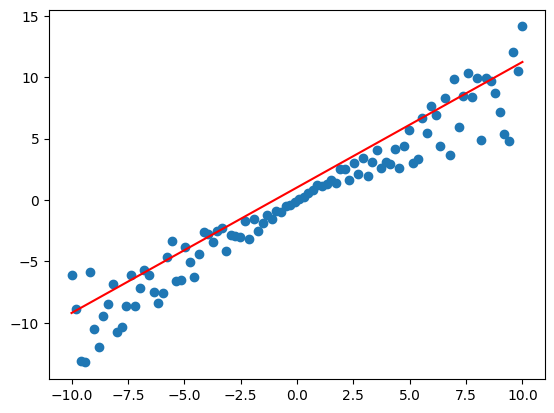

In [162]:
def ols_solution(X, y):
    w = (np.linalg.pinv((X.T @ X)) @ X.T) @ y
    return w

# The code below is a test for analytical solution
X = np.linspace(-10,10,100)

print(X.shape)

y = X * (np.random.random_sample(len(X)) + 0.5)
X = X.reshape(len(X), 1)

weights = ols_solution(X, y)
pred = predict(X, np.repeat(weights, 2))
plt.scatter(X, y)
plt.plot(X, pred, '-', c = 'r')

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [163]:
def stohastic_gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        sample = random.sample(range(0, X.shape[0] - 1), 1)
        params = params -  2 * learning_rate * (X[sample] * ((X[sample] @ params) - y[sample]))
        params = params[0]
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**): 

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации. 

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [164]:
from sklearn.datasets import make_regression
import pandas as pd

X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features 
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123) 

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01


In [165]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

def gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

r2 score for gradient_descent: 0.7482986084011813


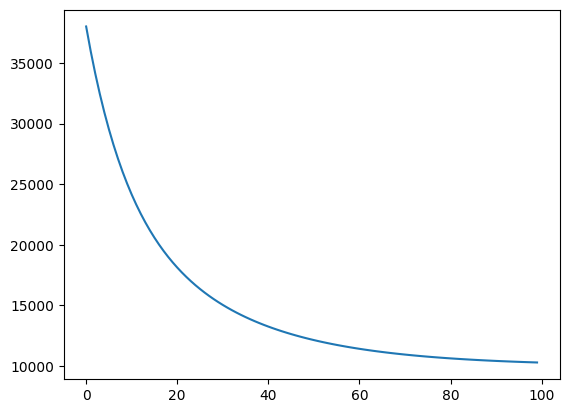

In [166]:
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
%matplotlib inline


track, weights = gradient_descent(X, y, 0.01, 100)
pred = predict(X, weights)
r2 = r2_score(y, pred)
print('r2 score for gradient_descent:', r2)
plt.plot(track)

In [167]:
weights = ols_solution(X, y)
pred = predict(X, np.repeat(weights, 2))
r2 = r2_score(y, pred)
print('r2 score for gradient_descent:', r2)

Exception: Dot product shape mismatch, (22,) vs (12, 100000)

r2 score for stohastic_gradient_descent: 0.7295418873066111


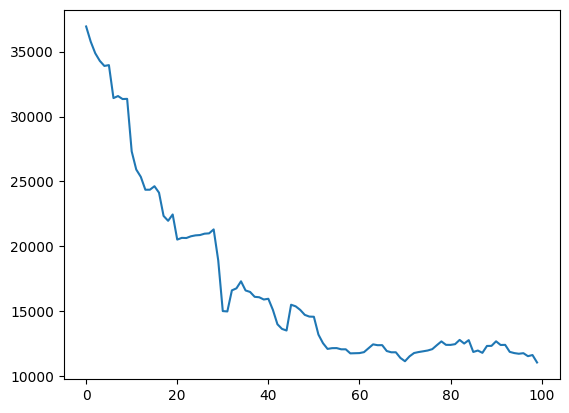

In [169]:
track, weights = stohastic_gradient_descent(X, y, 0.01, 100)
pred = predict(X, weights)
r2 = r2_score(y, pred)
print('r2 score for stohastic_gradient_descent:', r2)
plt.plot(track)